In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [18]:
df = pd.read_csv('../docs/ai_hub/ai_hub_data.csv', encoding='UTF-8')

review_df = pd.read_csv('../docs/review_sort_by_likes.csv', encoding='UTF-8')

print(df)

             SentimentText  SentimentPolarity
0               유통기한도 넉넉하고                  1
1       구성도 많아서 선물 하기 좋네요.                  1
2                   구성도알차고                  1
3                촉촉하고너무좋아용                  1
4      대용량으로 넉넉하게 사용할 수 있고                  1
...                    ...                ...
51509                  순하고                  1
51510     번들거리는 게 없어 좋습니다.                  1
51511          저렴하게 구매했네요.                  1
51512               발림도 좋고                  1
51513   피부가 쫀득쫀득해지는거 같습니다.                  1

[51514 rows x 2 columns]


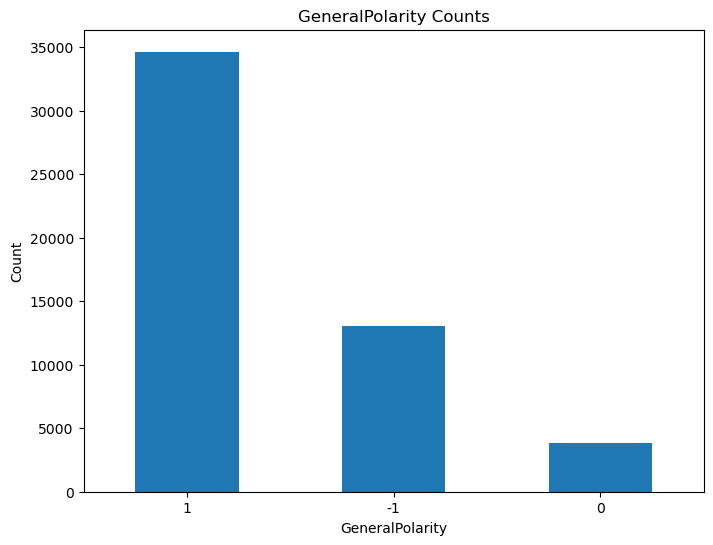

In [26]:
# GeneralPolarity의 값별로 개수를 집계합니다.
polarity_counts = df['SentimentPolarity'].value_counts()

# 바 차트로 시각화합니다.
plt.figure(figsize=(8, 6))
polarity_counts.plot(kind='bar')
plt.title('GeneralPolarity Counts')
plt.xlabel('GeneralPolarity')
plt.ylabel('Count')
plt.xticks(rotation=0)  # X축 라벨을 수평으로 설정
plt.show()

In [31]:
# 'SentimentPolarity'가 0인 행 삭제
df = df[df['SentimentPolarity'] != 0]

# 변경 후 데이터프레임 길이 출력
print(len(df['SentimentPolarity']))

47684


In [32]:
review_df['content'] = review_df['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

review_df = review_df.dropna(how = 'any')

print(len(review_df))

print(review_df.head())

34910
              id                                               name  \
0  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
1  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
2  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
3  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
4  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   

         date                                            content  
0  2023.11.30  피부타입 : 복합성요 토너 없이는 못살아요겨울 강철 추위도 버티게 해주는 저의 최애...  
1  2023.11.28  다른 토너로 갈아탔다가 환절기 때 피부가 뒤집어지고 너무 안 돌아와서 다시 구매합니...  
2  2023.11.26  전 이거 하나로 흡토, 닦토 다 하고 있어요 자극없이 순하고 용량도 많아서 밤마다 ...  
3  2023.11.19    자극없이 순하고 결 정돈하기 좋은 토너예요👍🏻민감성 지성 복합성 다 두루 쓰기 좋아요  
4  2023.11.11  이제는 제 화장대에 없는게 말이 안되는 재구매템정말이지 공병만 몇 십병 만들었을거에...  


In [33]:
df['SentimentText'] = df['SentimentText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['SentimentText'] = df['SentimentText'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['SentimentText'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거

print('전처리 후 학습 데이터 수 :',len(df))

# 라벨링 된 데이터를 train - test data set으로 분할.

X_train, X_test, y_train, y_test = train_test_split(df['SentimentText'], df['SentimentPolarity'], test_size=0.2, random_state=42)

print(f"훈련 데이터 수: {len(X_train)}")
print(f"테스트 데이터 수: {len(X_test)}")

전처리 후 학습 데이터 수 : 47684
훈련 데이터 수: 38147
테스트 데이터 수: 9537


In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("tfidf_vect", TfidfVectorizer(stop_words="english", ngram_range=(1,2) ) ),
    ("LR", LogisticRegression(C=10) )
])

# 학습/예측/평가
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
pred_prob = pipeline.predict_proba(X_test)[:,1]

acc_lr = accuracy_score(y_test, pred)
auc_lr = roc_auc_score(y_test, pred_prob)

print(f"예측 정확도: {acc_lr:.4f}, ROC-AUC: {auc_lr:.4f}")

C:\Users\youwj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도: 0.9294, ROC-AUC: 0.9694


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline


df = pd.read_csv('../docs/ai_hub/ai_hub_data.csv', encoding='UTF-8')

review_df = pd.read_csv('../docs/review_sort_by_likes.csv', encoding='UTF-8')

# 'SentimentPolarity'가 0인 행 삭제
df = df[df['SentimentPolarity'] != 0]

review_df['content'] = review_df['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
review_df = review_df.dropna(how = 'any')

df['SentimentText'] = df['SentimentText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['SentimentText'] = df['SentimentText'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['SentimentText'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거

# 라벨링 된 데이터를 train - test data set으로 분할.
X_train, X_test, y_train, y_test = train_test_split(df['SentimentText'], df['SentimentPolarity'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("tfidf_vect", TfidfVectorizer(stop_words="english", ngram_range=(1,2) ) ),
    ("LR", LogisticRegression(C=10) )
])

# 학습/예측/평가
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
pred_prob = pipeline.predict_proba(X_test)[:,1]

acc_lr = accuracy_score(y_test, pred)
auc_lr = roc_auc_score(y_test, pred_prob)

print(f"예측 정확도: {acc_lr:.4f}, ROC-AUC: {auc_lr:.4f}")

C:\Users\youwj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도: 0.9294, ROC-AUC: 0.9694


In [10]:
def predict_sentiment(sentence):

    prediction = pipeline.predict([sentence])
    return 1 if prediction == 1 else 0


sentence = "보습은 나쁘지 않아요"
predict_sentiment(sentence)

1